# Exploratory Data Analysis

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

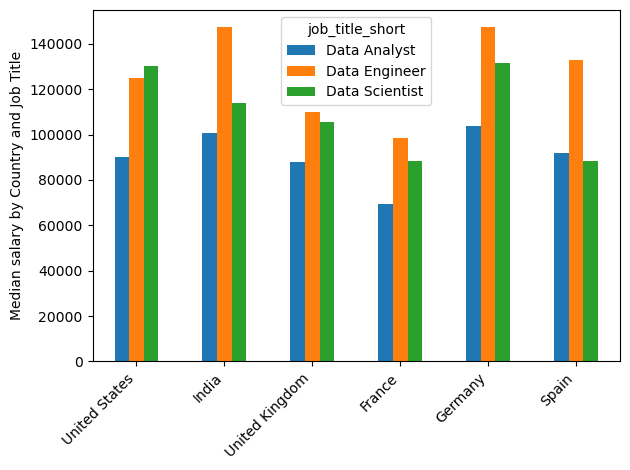

In [3]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Median salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter for Pakistan Data Scientist roles

In [4]:
df_DS_PK = df[(df['job_country'] == 'Pakistan') & (df['job_title_short'] == 'Data Scientist')]

df_DS_PK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
4006,Data Scientist,Senior Data Scientist Jobs,"Karachi, Pakistan",via Jobiflix.online,Full-time,False,Pakistan,2023-01-01 13:40:38,False,False,Pakistan,None,NaN,NaN,Afiniti,"[python, r, sql, scikit-learn, mlr]","{'libraries': ['scikit-learn', 'mlr'], 'progra..."
6332,Data Scientist,Python Data Scientist,Anywhere,via LinkedIn,Full-time,True,Pakistan,2023-10-08 13:34:42,False,False,Pakistan,None,NaN,NaN,Turing,"[python, sql, jupyter, express]","{'libraries': ['jupyter'], 'programming': ['py..."
6729,Data Scientist,Data Scientist,"Lahore, Pakistan",via LinkedIn Pakistan,Full-time,False,Pakistan,2023-01-17 13:17:59,False,False,Pakistan,None,NaN,NaN,ArhamSoft (Pvt) Ltd,"[python, django, flask]","{'programming': ['python'], 'webframeworks': [..."
7353,Data Scientist,Data Scientist - Remote,"Lahore, Pakistan",via Indeed,Part-time and Contractor,False,Pakistan,2023-09-21 13:27:29,False,False,Pakistan,None,NaN,NaN,Innovadel Technologies,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
9281,Data Scientist,Database Engineer - Remote from India,Anywhere,via Jobgether,Full-time,True,Pakistan,2023-11-24 13:16:36,True,False,Pakistan,None,NaN,NaN,BrightEdge,"[sql, nosql, mysql, postgresql, bigquery]","{'cloud': ['bigquery'], 'databases': ['mysql',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771846,Data Scientist,Data Science Internship,"Lahore, Pakistan",via LinkedIn,Full-time and Internship,False,Pakistan,2023-09-11 01:14:07,False,False,Pakistan,None,NaN,NaN,The Social Nexus,None,None
779745,Data Scientist,Trainee Data Science,"Lahore, Pakistan",via LinkedIn,Full-time,False,Pakistan,2023-06-20 05:33:50,False,False,Pakistan,None,NaN,NaN,Programmers Force,"[python, r, java, sql, numpy, pandas, scikit-l...","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
784020,Data Scientist,Data Scientist,"Lahore, Pakistan",via LinkedIn Pakistan,Full-time,False,Pakistan,2023-01-03 06:34:29,False,False,Pakistan,None,NaN,NaN,ChainzExperts (Pvt) Ltd (Blockchain Developmen...,"[python, r, java, sql, cassandra, hadoop, spark]","{'databases': ['cassandra'], 'libraries': ['ha..."
784584,Data Scientist,Data Scientist,"Islamabad, Pakistan",via Ai-Jobs.net,Contractor,False,Pakistan,2023-06-07 06:17:01,False,False,Pakistan,year,157500.0,NaN,Inbox Business Technologies,"[sql, python, r, hadoop]","{'libraries': ['hadoop'], 'programming': ['sql..."


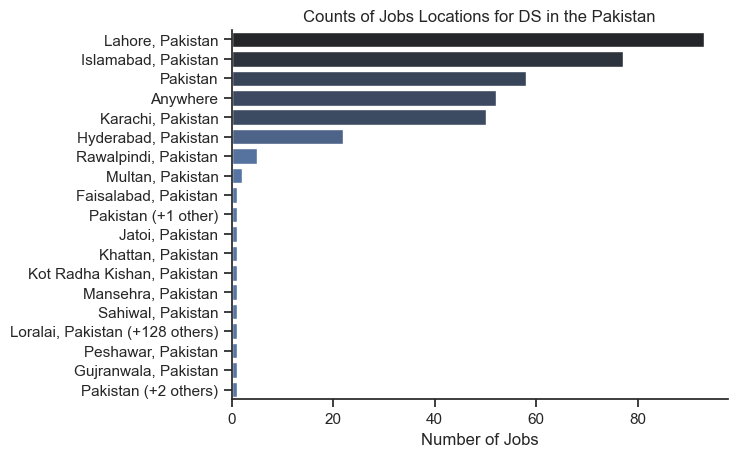

In [5]:
df_jobloc_plot = df_DS_PK['job_location'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_jobloc_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Jobs Locations for DS in the Pakistan')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

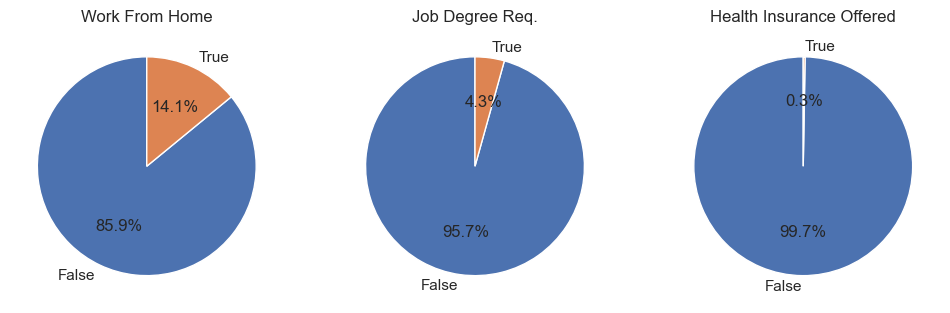

In [6]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

columns = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(columns.items()):
    ax[i].pie(df_DS_PK[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'])  
    ax[i].set_title(title)


plt.show()

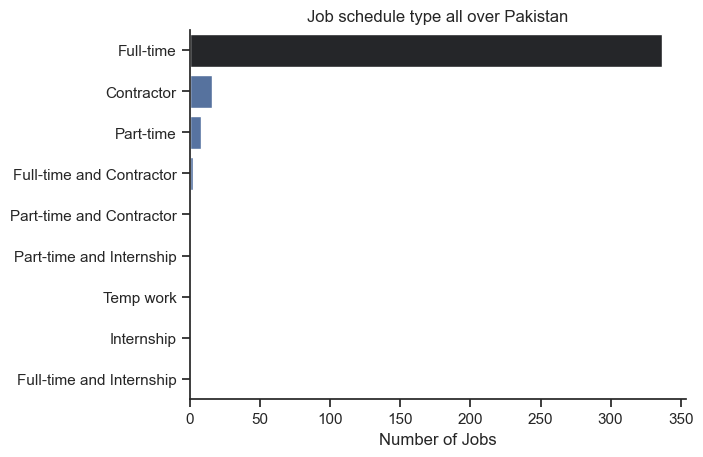

In [7]:
df_jobtype_plot = df_DS_PK['job_schedule_type'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_jobtype_plot, x='count', y='job_schedule_type', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Job schedule type all over Pakistan')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

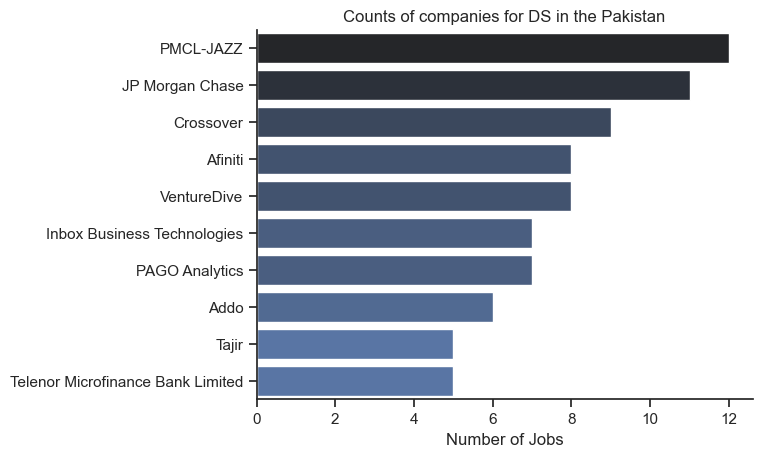

In [8]:
df_plot = df_DS_PK['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of companies for DS in the Pakistan')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()